In [1]:
import math
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import collections as col
import re
import random
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
#from sklearn.svm import LinearSVC
from sklearn import linear_model
from sklearn import metrics
from sklearn.ensemble import AdaBoostClassifier
#from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import auc,roc_curve

In [6]:
def linear_bid(baseline_bid, pCTR_norm):
    lin_bid= baseline_bid* pCTR_norm
    return lin_bid

def w_bid(baseline_bid, pCTR_norm, c, lambd):
    w_b= b_bid(baseline_bid, pCTR_norm, c, lambd)/ (b_bid(baseline_bid, pCTR_norm, c, lambd)+ c)
    return w_b

def b_bid(baseline_bid, pCTR_norm, c, lambd):
    nlin_bid= (np.sqrt(((c/ lambd)* pCTR_norm)+ (c**2))- c)/ (\
              (np.sqrt(((c/ lambd)* pCTR_norm)+ (c**2))- c)+ c)* baseline_bid
    return nlin_bid

In [7]:
plt.plot([x for x in range(0, 301)], [nlinear_bid(x, 10, 20, 2) for x in range(0, 301)], label="c= 20")
plt.plot([x for x in range(0, 301)], [nlinear_bid(x, 10, 50, 2) for x in range(0, 301)], label="c= 50")
plt.plot([x for x in range(0, 301)], [nlinear_bid(x, 10, 80, 2) for x in range(0, 301)], label="c= 80")

plt.ylabel('w (b)')
plt.xlabel('bidprice')
plt.title('Winning function 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

TypeError: nlinear_bid() takes 2 positional arguments but 4 were given

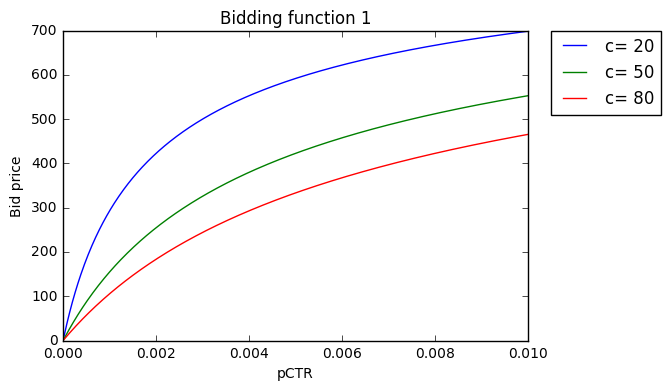

In [9]:
plt.plot([x/50000 for x in range(1, 501)], [b_bid(1000, y/50000, 20, 0.00005) for y in range(1, 501)], label="c= 20")
plt.plot([x/50000 for x in range(1, 501)], [b_bid(1000, y/50000, 50, 0.00005) for y in range(1, 501)], label="c= 50")
plt.plot([x/50000 for x in range(0, 501)], [b_bid(1000, y/50000, 80, 0.00005) for y in range(0, 501)], label="c= 80")

#plt.plot([x/50000 for x in range(0, 501)], [linear_bid(300, y/50000) for y in range(0, 501)], label="Linear bid")

plt.ylabel('Bid price')
plt.xlabel('pCTR')
plt.title('Bidding function 1')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()